In [10]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [11]:
from keras.datasets import mnist

In [12]:
(X_train,Y_train),(X_valid,Y_valid) = mnist.load_data()

In [13]:
X_train =X_train .reshape(60000,784).astype('float32')
X_valid =X_valid .reshape(10000,784).astype('float32')

In [14]:
X_train /=255
X_valid /=255

In [16]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
from keras import utils as np_utils
n_Classes=10
Y_train=keras.utils.np_utils.to_categorical(Y_train,n_Classes)
Y_valid=keras.utils.np_utils.to_categorical(Y_valid,n_Classes)

In [18]:
Y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
model=Sequential()

In [21]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [26]:

model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [25]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1)

2022-11-07 14:18:27.851011: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/150
469/469 [==============================] - 15s 4ms/step - loss: 0.0934 - accuracy: 0.0915
Epoch 2/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.0954
Epoch 3/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0914 - accuracy: 0.1286
Epoch 4/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0908 - accuracy: 0.1666
Epoch 5/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0902 - accuracy: 0.1952
Epoch 6/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.2166
Epoch 7/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2336
Epoch 8/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0890 - accuracy: 0.2498
Epoch 9/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.2653
Epoch 10/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0883 - accur

In [28]:

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, Y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_valid, Y_train,Y_valid = train_test_split(X, Y, stratify=Y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

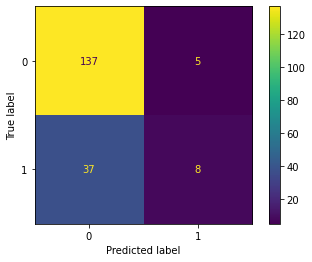

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()